# 데이터 전처리

In [2]:
from torchvision import datasets, transforms
from torch.utils import data 

# Data loader
train_loader = data.DataLoader(
    datasets.FashionMNIST( root='dataset/',
                    train=True,
                    download=True,
                    transform=transforms.Compose([
                        transforms.RandomHorizontalFlip(),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5,),std=(0.5,))
                    ])
    ),
    batch_size=32,
    shuffle=False
)

# Data loader
test_loader = data.DataLoader(
    datasets.FashionMNIST( root='dataset/',
                    train=False,
                    download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5,),std=(0.5,))
                    ])
    ),
    batch_size=32,
    shuffle=False
)

len(train_loader), len(test_loader)

(1875, 313)

In [3]:
images, labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [4]:
images[0].shape

torch.Size([1, 28, 28])

In [5]:
import numpy as np
import torch
torch_image = torch.squeeze(images[0])
print(torch_image.shape)

torch.Size([28, 28])


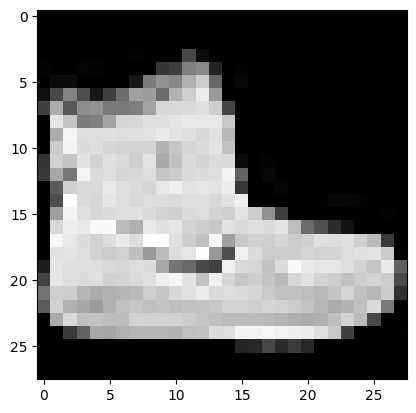

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import matplotlib.pyplot as plt

plt.imshow(torch_image.numpy(),'gray')
plt.show()

In [7]:
labels[0]

tensor(9)

# CNN

## Model 정의

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f

In [10]:
torch.manual_seed(14)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class Cnn(nn.Module):
    def __init__(self, dropout=0.2):
        super(Cnn, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 160)
        self.fc2 = nn.Linear(160,80)
        self.fc3 = nn.Linear(80,10)
    def forward(self, x):
        x = f.relu(f.max_pool2d(self.conv1(x),2))
        x = f.relu(f.max_pool2d(self.conv1(self.conv2(x)),2))
        x = x.view(-1, 320)
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = f.dropout(x, training=self.training)
        x = self.fc3(x)
        return x